<table>
    <tr>
        <td  style="background-color:#ffffff;"><a href="https://qsoftware.lu.lv/index.php/qworld/" target="_blank"><img src="..\images\qworld.jpg" width="70%" align="left"></a></td>
        <td style="background-color:#ffffff;" width="*"></td>
        <td  style="background-color:#ffffff;vertical-align:text-top;"><a href="https://qsoftware.lu.lv" target="_blank"><img src="..\images\logo.jpg" width="25%" align="right"></a></td>        
    </tr>
    <tr><td colspan="3" align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a>
    </td></tr>
    <tr><td colspan="3" align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2>Hadamard</h2>

An example quantum operator for quantum coin-flipping is called Hadamard. 

It is referred as h-gate in Qiskit.

<h3> The first experiment</h3>

We implement the first experiment.

Our quantum bit (<b>qubit</b>) starts in state 0, which is shown as $ \ket{0} = \myvector{1 \\ 0} $.

<i>Note: $ \ket{\cdot} $ is called ket-notation:  Ket-notation is used to represent a column vector in quantum mechanics. 
For a given column vector $ \ket{v} $, its conjugate transpose is a row vector represented as $ \bra{v} $ (bra-notation). 
</i>

<h4> The circuit with a single Hadamard </h4>

We design a circuit with one qubit, and apply quantum coin-flipping once.

In [1]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define a quantum register with one qubit
qreg1 =  QuantumRegister(1)

# define a classical register with one bit
# it stores the measurement result of the quantum part
creg1 = ClassicalRegister(1)

# define our quantum circuit
mycircuit1 = QuantumCircuit(qreg1,creg1)

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
mycircuit1.h(qreg1[0])

# measure the first qubit, and store the result in the first classical bit
mycircuit1.measure(qreg1,creg1)

print("Everything looks fine, let's continue ...")

Everything looks fine, let's continue ...


In [2]:
# draw the circuit by using ASCII art
mycircuit1.draw()

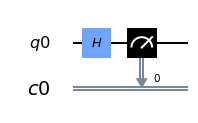

In [3]:
# draw the circuit by using matplotlib

mycircuit1.draw(output='mpl')
# reexecute this cell if you DO NOT see the circuit diagram

<img src="../images/photon1.jpg" width="40%">

In [4]:
# execute the circuit 10000 times in the local simulator

job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=10000)
counts1 = job.result().get_counts(mycircuit1)
print(counts1) # print the outcomes

{'1': 4968, '0': 5032}


The numbers of outcomes '0's and '1's are expected to be close to each other.

<img src="../images/photon2.jpg" width="40%">

<b style="color:black;"> As we have observed after this implementation, quantum systems output probabilistically.</b>

<h3> The third experiment </h3>

We will examine the second experiment later because it requires intermediate measurement. (We can do intermediate measurements in simulators, but it is not possible in the real machines.)

Now, we implement the third experiment.

<img src="../images/photon6.jpg" width="60%">

<h4> The circuit with two Hadamards </h4>

We design a circuit with one qubit, and apply quantum coin-flipping twice.

In [5]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define a quantum register with one qubit
qreg2 =  QuantumRegister(1)

# define a classical register with one bit
# it stores the measurement result of the quantum part
creg2 = ClassicalRegister(1)

# define our quantum circuit
mycircuit2 = QuantumCircuit(qreg2,creg2)

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
mycircuit2.h(qreg2[0])

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit once more
mycircuit2.h(qreg2[0])

# measure the first qubit, and store the result in the first classical bit
mycircuit2.measure(qreg2,creg2)

print("Everything looks fine, let's continue ...")

Everything looks fine, let's continue ...


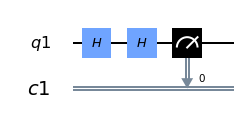

In [6]:
# draw the circuit by using matplotlib

mycircuit2.draw(output='mpl')
# reexecute me if you DO NOT see the circuit diagram

In [7]:
# execute the circuit 10000 times in the local simulator

job = execute(mycircuit2,Aer.get_backend('qasm_simulator'),shots=10000)
counts2 = job.result().get_counts(mycircuit2)
print(counts2)

{'0': 10000}


The <u>only outcome</u> must be '0'.

<img src="../images/photon7.jpg" width="60%">

<h3> Task 1 </h3>

Remember that x-gate flips the value of a qubit.

Design a quantum circuit with a single qubit.

The qubit is initially set to $ \ket{0} $.

Set the value of qubit to $ \ket{1} $ by using x-gate.

Experiment 1: Apply one Hadamard gate, make measurement, and execute your program 10000 times.

Experiment 2: Apply two Hadamard gates, make measurement, and execute your program 10000 times.

Compare your results.

The following two diagrams represent two different experiments.

<table>
    <tr>
        <td><img src="../images/photon8.jpg" width="80%"></td>
        <td><img src="../images/photon9.jpg" width="70%"></td>
    </tr>
</table>

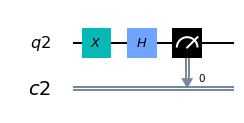

In [8]:
# task1
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define a quantum register with one qubit
qreg2 =  QuantumRegister(1)

# define a classical register with one bit
# it stores the measurement result of the quantum part
creg2 = ClassicalRegister(1)

# define our quantum circuit
mycircuit2 = QuantumCircuit(qreg2,creg2)

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
mycircuit2.x(qreg2[0])

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit once more
mycircuit2.h(qreg2[0])

# measure the first qubit, and store the result in the first classical bit
mycircuit2.measure(qreg2,creg2)
# draw the circuit by using matplotlib

mycircuit2.draw(output='mpl')
# reexecute me if you DO NOT see the circuit diagram

<a href="B24_Hadamard_Solution.ipynb#task1">click for our solution</a>

In [12]:
# execute the circuit 10000 times in the local simulator

job = execute(mycircuit2,Aer.get_backend('qasm_simulator'),shots=10000)
counts2 = job.result().get_counts(mycircuit2)
print(counts2)

{'1': 5090, '0': 4910}


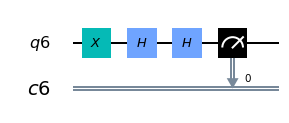

In [16]:
# task1
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define a quantum register with one qubit
qreg2 =  QuantumRegister(1)

# define a classical register with one bit
# it stores the measurement result of the quantum part
creg2 = ClassicalRegister(1)

# define our quantum circuit
mycircuit2 = QuantumCircuit(qreg2,creg2)

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
mycircuit2.x(qreg2[0])

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit once more
mycircuit2.h(qreg2[0])
mycircuit2.h(qreg2[0])

# measure the first qubit, and store the result in the first classical bit
mycircuit2.measure(qreg2,creg2)
# draw the circuit by using matplotlib

mycircuit2.draw(output='mpl')
# reexecute me if you DO NOT see the circuit diagram

In [18]:
# execute the circuit 10000 times in the local simulator

job = execute(mycircuit2,Aer.get_backend('qasm_simulator'),shots=10000)
counts2 = job.result().get_counts(mycircuit2)
print(counts2)


{'1': 10000}
